In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('gurgaonPropertyMissingValueImputation.csv')

In [5]:
df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,Built Up area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.000000,2.0,2.0,1,4.0,Relatively New,1000.0,0,0,0,0,0,1,28
1,flat,apna enclave,sector 3,0.50,7692.307692,2.0,2.0,1,1.0,Old Property,722.0,0,0,0,0,0,0,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.689076,2.0,2.0,3,12.0,New Property,661.0,0,0,0,0,0,1,36
3,flat,smart world orchard,sector 61,1.47,12250.000000,2.0,2.0,2,2.0,New Property,1333.0,0,0,0,0,0,1,76
4,flat,parkwood westend,sector 92,0.70,5204.460967,2.0,2.0,3,5.0,Under Construction,1217.0,0,0,0,0,0,1,0


In [6]:
df.shape

(3547, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3547 non-null   object 
 1   society          3547 non-null   object 
 2   sector           3547 non-null   object 
 3   price_in_crores  3547 non-null   float64
 4   price_per_sqft   3547 non-null   float64
 5   bedRoom          3547 non-null   float64
 6   bathroom         3547 non-null   float64
 7   balcony          3547 non-null   object 
 8   floorNum         3547 non-null   float64
 9   agePossession    3547 non-null   object 
 10  Built Up area    3547 non-null   float64
 11  study room       3547 non-null   int64  
 12  store room       3547 non-null   int64  
 13  Pooja Room       3547 non-null   int64  
 14  servant room     3547 non-null   int64  
 15  Others           3547 non-null   int64  
 16  furnishing_type  3547 non-null   int64  
 17  luxury_score  

In [11]:
train_df = df.drop(columns=['society','price_per_sqft'], axis=1)

In [12]:
train_df.head()

,property_type,sector,price_in_crores,bedRoom,bathroom,balcony,floorNum,agePossession,Built Up area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
0,flat,sector 7,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0,0,0,0,0,1,28
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0,0,0,0,0,0,37
2,flat,sohna road,0.40,2.0,2.0,3,12.0,New Property,661.0,0,0,0,0,0,1,36
3,flat,sector 61,1.47,2.0,2.0,2,2.0,New Property,1333.0,0,0,0,0,0,1,76
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,0,0,0,0,0,1,0


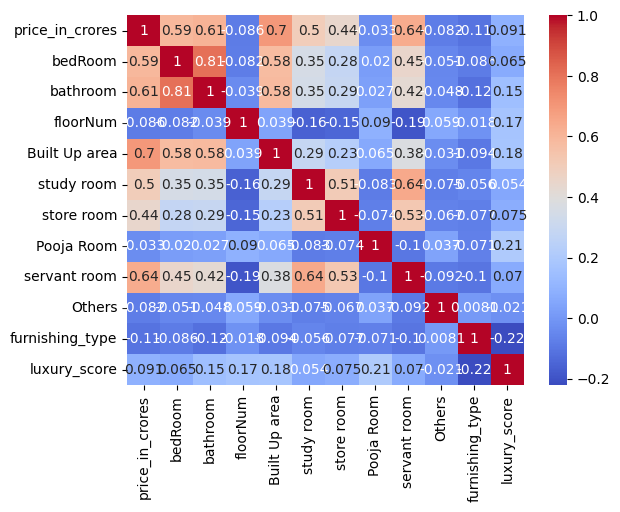

In [17]:
numeric_df = train_df.select_dtypes(include='number')

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
numeric_df = train_df.select_dtypes(include='number')

# Correlation of price_in_crores with all other numeric columns
numeric_df.corr()['price_in_crores'].sort_values(ascending=False)

price_in_crores    1.000000
Built Up area      0.697839
servant room       0.637467
bathroom           0.610042
bedRoom            0.591303
study room         0.503140
store room         0.443994
luxury_score       0.090597
Pooja Room        -0.032553
Others            -0.081890
floorNum          -0.086167
furnishing_type   -0.110044
Name: price_in_crores, dtype: float64

In [21]:
df.to_csv('Feature_selection_and_feature_engineering.csv',index=False)